# Random sub-sampling run example

In [1]:
"""
Choose the dataset name for the ground_truth and graph embeddings (examples are: "monitor" and "openML")
"""
dataset_name = "openML"

"""
choose integer number of ratio negative/positive for the negative sampling (0 to 20)
"""
neg_sample = 2

"""
Choose experiment ["hold_out","random_subsam","10_cv"] : 
- hold_out will get the train/test split within ./ground_truth/dataset_name/hold_out
- random_subsam will isolate 1 node from some clusters of similar nodes in the ground truth. The isolated nodes will not be seen during training
- 10_cv: will split the ground truth in 10 folds, using each fold as test at least once. 
"""
strategy = "random_subsam"

"""
Choose to use the selected strategy to create a new split 
or reuse a previously created one (useful to repeat exact same experiment)
"""
create_new_split = True

print("Env variables set")

#import libraries
import step3_gcnsm
from step3_gcnsm import confusion_matrix as confusion_matrix
from step3_gcnsm import train as train
from step3_gcnsm import cross_validation as cross_validation
from step3_gcnsm import test_mask, train_mask
from step3_gcnsm import g
import step3_gcn_nn_concatenate as gcn_nn
import step3_gcn_loss as gcn_loss
import step3_gcn_training as gcn_training
import step3_plot_results as plot
step3_gcnsm.load_env(ds_name=dataset_name,ns=neg_sample,experiment=strategy,new_split=create_new_split)
print("\n SETUP IS READY")

Env variables set


Using backend: pytorch


Values to load
dataset_name=openML
neg_sample= 2
strategy= random_subsam
create_new_split= True
cross_v= 0
Creating cross validation splits...
ITERATION: 0
ITERATION: 1
ITERATION: 2
ITERATION: 3
ITERATION: 4
ITERATION: 5
ITERATION: 6
ITERATION: 7
ITERATION: 8
ITERATION: 9
ITERATION: 10
ITERATION: 11
ITERATION: 12
ITERATION: 13
ITERATION: 14
ITERATION: 15
ITERATION: 16
ITERATION: 17
ITERATION: 18
ITERATION: 19
Train/Test split done
Dataset splits loaded
Train positive samples: 456 Test positive samples: 87
Meta-feature graph from datasets loaded

 SETUP IS READY


# Choose NN architecture and loss function, then run tests

### Config and run training
### NN architectures: 

In [3]:
##run this to see the different options of NN architectures
gcn_nn.get_options()

{0: 'Bert2_400',
 1: 'Bert2_832',
 2: 'Bert2_832_400_200_100',
 3: 'Bert2_832_600_400_200',
 4: 'Bert_300',
 5: 'Bert_300_300_200',
 6: 'Bert_768',
 7: 'Fasttext2',
 8: 'Fasttext2_150',
 9: 'Fasttext2_200_200',
 10: 'Fasttext2_200_200_100',
 11: 'Fasttext2_200_200_200',
 12: 'Fasttext2_200_200_200_100',
 13: 'Fasttext2_200_200_200_100_relu',
 14: 'Fasttext2_300_250_200_150',
 15: 'Fasttext2_364',
 16: 'Fasttext2_364_200_100',
 17: 'Fasttext2_364_200_100_relu',
 18: 'Fasttext2_364_300_200_100',
 19: 'Fasttext2_364_300_200_100_relu',
 20: 'Fasttext2_364_300_250_200',
 21: 'Fasttext2_364_364_364',
 22: 'Fasttext2_364_nn',
 23: 'Fasttext2_3GCN_300_250_200_150',
 24: 'Fasttext2_728',
 25: 'Fasttext2_728364',
 26: 'Fasttext2_728_364',
 27: 'Fasttext2d_300_250_200_150',
 28: 'Fasttext2d_364',
 29: 'Fasttext2d_364_364_364',
 30: 'Fasttext2d_728_364',
 31: 'Fasttext3GCN_300',
 32: 'FasttextSum_150',
 33: 'FasttextSum_300_250_200_150',
 34: 'FasttextSum_364',
 35: 'FasttextSum_364_200_100',
 36:

### Loss functions: 
{<br>
    "0": "ContrastiveLoss", <br>
    "1": "CosineEmbeddingLoss", <br>
}

### Optimizer
{<br>
    "adam" (default)<br>
    "sgd"<br> 
}


### Loss functions parameters examples: format -> [margin]+[aggregation_function] 
{<br>
    0.9+mean, <br>
    0.7+mean, <br>
    0.5+mean, <br>
    0.3+mean, <br>
    0.9+sum, <br>
    0.7+sum, <br>
    0.5+sum, <br>
    0.3+sum, <br>
}

### batch_splits examples: 
{<br>
    1024, <br>
    2048, <br>
}
### learning rate examples (lr): 
{<br>
    6e-3, <br>
    1e-2, <br>
}

### Random sub-sampling run example

In [2]:
#train new model and specify parameters
training_object = gcn_training.Training()
training_object.set_training(
            net_name= "Fasttext2_364",  #_of_option for NN architecture
            batch_splits=1024 ,#_of_sets(this will (give dataset / batch_splits) size of batch
            lr=1e-2 , #learning rate for training (e.g. 1e-3 )
            loss_name=gcn_loss.get_option_name(1), #_of_option for loss 
            loss_parameters="0.5+mean" ,#loss function parameters separated by '+' e.g. for cosine and contrastive "0.0+mean"
            optimizer_name="sgd" ) #adam or sgd, default adam

cross_validation(training_object,120,"1-20",nsample=2)

Values to load
dataset_name=openML
neg_sample= 0
strategy= random_subsam
create_new_split= False
cross_v= 0
Dataset splits loaded
Train positive samples: 456 Test positive samples: 87
Meta-feature graph from datasets loaded
Start of training...NN Fasttext2_364 Loss CosineEmbeddingLoss Split 1024: 
Ep:0, loss:0.00062, loss_test:0.24383, lr:1.00e-02, fs:0.66667 (r=1.000,p=0.500),  time:4.804, tt:4.804
##########Best model found so far##########
Ep:1, loss:0.00062, loss_test:0.24224, lr:9.90e-03, fs:0.66667 (r=1.000,p=0.500),  time:4.765, tt:9.530
Ep:2, loss:0.00061, loss_test:0.23904, lr:9.80e-03, fs:0.66667 (r=1.000,p=0.500),  time:5.152, tt:15.455
Ep:3, loss:0.00059, loss_test:0.23291, lr:9.70e-03, fs:0.66667 (r=1.000,p=0.500),  time:5.613, tt:22.453
Ep:4, loss:0.00055, loss_test:0.22094, lr:9.61e-03, fs:0.66667 (r=1.000,p=0.500),  time:5.733, tt:28.663
Ep:5, loss:0.00048, loss_test:0.20536, lr:9.51e-03, fs:0.66406 (r=0.977,p=0.503),  time:5.576, tt:33.459
Ep:6, loss:0.00040, loss_test

Ep:65, loss:0.00006, loss_test:0.10198, lr:5.20e-03, fs:0.92973 (r=0.989,p=0.878),  time:6.151, tt:405.940
Ep:66, loss:0.00005, loss_test:0.10309, lr:5.15e-03, fs:0.93407 (r=0.977,p=0.895),  time:6.161, tt:412.818
Ep:67, loss:0.00005, loss_test:0.10563, lr:5.10e-03, fs:0.92655 (r=0.943,p=0.911),  time:6.188, tt:420.772
Ep:68, loss:0.00005, loss_test:0.10440, lr:5.05e-03, fs:0.93258 (r=0.954,p=0.912),  time:6.217, tt:428.969
Ep:69, loss:0.00005, loss_test:0.10409, lr:5.00e-03, fs:0.92655 (r=0.943,p=0.911),  time:6.212, tt:434.845
Ep:70, loss:0.00005, loss_test:0.09824, lr:4.95e-03, fs:0.93478 (r=0.989,p=0.887),  time:6.203, tt:440.427
Ep:71, loss:0.00005, loss_test:0.10787, lr:4.90e-03, fs:0.87861 (r=0.874,p=0.884),  time:6.192, tt:445.812
Ep:72, loss:0.00005, loss_test:0.10101, lr:4.85e-03, fs:0.93923 (r=0.977,p=0.904),  time:6.189, tt:451.812
Ep:73, loss:0.00004, loss_test:0.10073, lr:4.80e-03, fs:0.93923 (r=0.977,p=0.904),  time:6.189, tt:457.950
Ep:74, loss:0.00004, loss_test:0.1098

Ep:17, loss:0.00023, loss_test:0.19313, lr:8.43e-03, fs:0.76142 (r=0.862,p=0.682),  time:6.093, tt:109.671
##########Best model found so far##########
Ep:18, loss:0.00022, loss_test:0.19098, lr:8.35e-03, fs:0.72195 (r=0.851,p=0.627),  time:6.081, tt:115.534
Ep:19, loss:0.00021, loss_test:0.19709, lr:8.26e-03, fs:0.68657 (r=0.793,p=0.605),  time:6.061, tt:121.226
Ep:20, loss:0.00021, loss_test:0.18966, lr:8.18e-03, fs:0.72165 (r=0.805,p=0.654),  time:6.039, tt:126.828
Ep:21, loss:0.00020, loss_test:0.19248, lr:8.10e-03, fs:0.69189 (r=0.736,p=0.653),  time:6.012, tt:132.258
Ep:22, loss:0.00019, loss_test:0.18997, lr:8.02e-03, fs:0.73684 (r=0.805,p=0.680),  time:5.987, tt:137.702
Ep:23, loss:0.00019, loss_test:0.18214, lr:7.94e-03, fs:0.70936 (r=0.828,p=0.621),  time:5.957, tt:142.958
Ep:24, loss:0.00019, loss_test:0.19035, lr:7.86e-03, fs:0.69945 (r=0.736,p=0.667),  time:5.962, tt:149.061
Ep:25, loss:0.00017, loss_test:0.18560, lr:7.78e-03, fs:0.76923 (r=0.862,p=0.694),  time:5.932, tt:1

Ep:87, loss:0.00004, loss_test:0.15557, lr:4.17e-03, fs:0.80982 (r=0.759,p=0.868),  time:6.104, tt:537.142
Ep:88, loss:0.00004, loss_test:0.16189, lr:4.13e-03, fs:0.82424 (r=0.782,p=0.872),  time:6.105, tt:543.367
Ep:89, loss:0.00004, loss_test:0.15716, lr:4.09e-03, fs:0.85882 (r=0.839,p=0.880),  time:6.106, tt:549.565
Ep:90, loss:0.00004, loss_test:0.15592, lr:4.05e-03, fs:0.83636 (r=0.793,p=0.885),  time:6.103, tt:555.387
Ep:91, loss:0.00004, loss_test:0.16136, lr:4.01e-03, fs:0.82635 (r=0.793,p=0.863),  time:6.102, tt:561.374
Ep:92, loss:0.00004, loss_test:0.16317, lr:3.97e-03, fs:0.85380 (r=0.839,p=0.869),  time:6.105, tt:567.741
Ep:93, loss:0.00004, loss_test:0.16017, lr:3.93e-03, fs:0.80745 (r=0.747,p=0.878),  time:6.107, tt:574.057
Ep:94, loss:0.00004, loss_test:0.17197, lr:3.89e-03, fs:0.77987 (r=0.713,p=0.861),  time:6.103, tt:579.768
Ep:95, loss:0.00003, loss_test:0.16231, lr:3.85e-03, fs:0.81212 (r=0.770,p=0.859),  time:6.100, tt:585.638
Ep:96, loss:0.00003, loss_test:0.1566

Ep:37, loss:0.00012, loss_test:0.15439, lr:6.89e-03, fs:0.77095 (r=0.793,p=0.750),  time:5.889, tt:223.798
Ep:38, loss:0.00012, loss_test:0.15438, lr:6.83e-03, fs:0.78409 (r=0.793,p=0.775),  time:5.961, tt:232.494
Ep:39, loss:0.00011, loss_test:0.15352, lr:6.76e-03, fs:0.75978 (r=0.782,p=0.739),  time:6.006, tt:240.235
Ep:40, loss:0.00011, loss_test:0.14979, lr:6.69e-03, fs:0.77095 (r=0.793,p=0.750),  time:6.008, tt:246.325
Ep:41, loss:0.00011, loss_test:0.15346, lr:6.62e-03, fs:0.79769 (r=0.793,p=0.802),  time:6.002, tt:252.082
Ep:42, loss:0.00011, loss_test:0.15334, lr:6.56e-03, fs:0.78161 (r=0.782,p=0.782),  time:6.003, tt:258.113
Ep:43, loss:0.00011, loss_test:0.15415, lr:6.49e-03, fs:0.79310 (r=0.793,p=0.793),  time:5.992, tt:263.642
Ep:44, loss:0.00010, loss_test:0.15164, lr:6.43e-03, fs:0.78409 (r=0.793,p=0.775),  time:5.975, tt:268.864
Ep:45, loss:0.00010, loss_test:0.15360, lr:6.36e-03, fs:0.79310 (r=0.793,p=0.793),  time:5.961, tt:274.226
Ep:46, loss:0.00010, loss_test:0.1488

Ep:113, loss:0.00002, loss_test:0.18341, lr:3.21e-03, fs:0.70748 (r=0.598,p=0.867),  time:6.009, tt:684.978
Ep:114, loss:0.00002, loss_test:0.18252, lr:3.18e-03, fs:0.71233 (r=0.598,p=0.881),  time:6.002, tt:690.176
Ep:115, loss:0.00002, loss_test:0.18165, lr:3.15e-03, fs:0.70748 (r=0.598,p=0.867),  time:5.996, tt:695.545
Ep:116, loss:0.00002, loss_test:0.17876, lr:3.12e-03, fs:0.70748 (r=0.598,p=0.867),  time:5.994, tt:701.284
Ep:117, loss:0.00002, loss_test:0.18040, lr:3.09e-03, fs:0.71724 (r=0.598,p=0.897),  time:5.990, tt:706.865
Ep:118, loss:0.00002, loss_test:0.18343, lr:3.05e-03, fs:0.70748 (r=0.598,p=0.867),  time:5.988, tt:712.567
Ep:119, loss:0.00002, loss_test:0.18104, lr:3.02e-03, fs:0.70748 (r=0.598,p=0.867),  time:5.978, tt:717.383
Model and results saved
Saving best model...
Model and results saved
Values to load
dataset_name=openML
neg_sample= 0
strategy= random_subsam
create_new_split= False
cross_v= 3
Dataset splits loaded
Train positive samples: 456 Test positive sam

Ep:59, loss:0.00006, loss_test:0.07673, lr:5.53e-03, fs:0.95082 (r=1.000,p=0.906),  time:6.266, tt:375.967
Ep:60, loss:0.00006, loss_test:0.08488, lr:5.47e-03, fs:0.94054 (r=1.000,p=0.888),  time:6.270, tt:382.491
Ep:61, loss:0.00006, loss_test:0.08617, lr:5.42e-03, fs:0.93989 (r=0.989,p=0.896),  time:6.251, tt:387.575
Ep:62, loss:0.00006, loss_test:0.08292, lr:5.36e-03, fs:0.94565 (r=1.000,p=0.897),  time:6.250, tt:393.773
Ep:63, loss:0.00006, loss_test:0.07592, lr:5.31e-03, fs:0.95604 (r=1.000,p=0.916),  time:6.239, tt:399.290
##########Best model found so far##########
Ep:64, loss:0.00006, loss_test:0.08270, lr:5.26e-03, fs:0.94915 (r=0.966,p=0.933),  time:6.224, tt:404.571
Ep:65, loss:0.00006, loss_test:0.08357, lr:5.20e-03, fs:0.94054 (r=1.000,p=0.888),  time:6.252, tt:412.603
Ep:66, loss:0.00006, loss_test:0.07919, lr:5.15e-03, fs:0.96667 (r=1.000,p=0.935),  time:6.287, tt:421.219
##########Best model found so far##########
Ep:67, loss:0.00005, loss_test:0.07850, lr:5.10e-03, fs:

Ep:9, loss:0.00031, loss_test:0.17074, lr:9.14e-03, fs:0.76684 (r=0.851,p=0.698),  time:6.545, tt:65.449
##########Best model found so far##########
Ep:10, loss:0.00029, loss_test:0.16512, lr:9.04e-03, fs:0.76440 (r=0.839,p=0.702),  time:6.385, tt:70.237
Ep:11, loss:0.00029, loss_test:0.16020, lr:8.95e-03, fs:0.79365 (r=0.862,p=0.735),  time:6.254, tt:75.043
##########Best model found so far##########
Ep:12, loss:0.00028, loss_test:0.15760, lr:8.86e-03, fs:0.82353 (r=0.885,p=0.770),  time:6.218, tt:80.833
##########Best model found so far##########
Ep:13, loss:0.00027, loss_test:0.15264, lr:8.78e-03, fs:0.83243 (r=0.885,p=0.786),  time:6.227, tt:87.176
##########Best model found so far##########
Ep:14, loss:0.00027, loss_test:0.14995, lr:8.69e-03, fs:0.84946 (r=0.908,p=0.798),  time:6.200, tt:92.998
##########Best model found so far##########
Ep:15, loss:0.00025, loss_test:0.14483, lr:8.60e-03, fs:0.86772 (r=0.943,p=0.804),  time:6.219, tt:99.510
##########Best model found so far######

Ep:79, loss:0.00004, loss_test:0.07826, lr:4.52e-03, fs:0.96667 (r=1.000,p=0.935),  time:6.302, tt:504.188
Ep:80, loss:0.00004, loss_test:0.07623, lr:4.48e-03, fs:0.95604 (r=1.000,p=0.916),  time:6.301, tt:510.386
Ep:81, loss:0.00004, loss_test:0.07978, lr:4.43e-03, fs:0.98305 (r=1.000,p=0.967),  time:6.297, tt:516.362
##########Best model found so far##########
Ep:82, loss:0.00004, loss_test:0.08144, lr:4.39e-03, fs:0.95604 (r=1.000,p=0.916),  time:6.301, tt:522.987
Ep:83, loss:0.00004, loss_test:0.08316, lr:4.34e-03, fs:0.95604 (r=1.000,p=0.916),  time:6.299, tt:529.112
Ep:84, loss:0.00004, loss_test:0.08290, lr:4.30e-03, fs:0.98305 (r=1.000,p=0.967),  time:6.295, tt:535.118
Ep:85, loss:0.00003, loss_test:0.08010, lr:4.26e-03, fs:0.96133 (r=1.000,p=0.926),  time:6.291, tt:540.994
Ep:86, loss:0.00004, loss_test:0.08902, lr:4.21e-03, fs:0.97207 (r=1.000,p=0.946),  time:6.288, tt:547.072
Ep:87, loss:0.00003, loss_test:0.08594, lr:4.17e-03, fs:0.96629 (r=0.989,p=0.945),  time:6.285, tt:5

Ep:29, loss:0.00016, loss_test:0.18812, lr:7.47e-03, fs:0.72189 (r=0.701,p=0.744),  time:6.083, tt:182.488
Ep:30, loss:0.00016, loss_test:0.19785, lr:7.40e-03, fs:0.66667 (r=0.609,p=0.736),  time:6.059, tt:187.814
Ep:31, loss:0.00015, loss_test:0.19367, lr:7.32e-03, fs:0.66250 (r=0.609,p=0.726),  time:6.030, tt:192.949
Ep:32, loss:0.00015, loss_test:0.18828, lr:7.25e-03, fs:0.72727 (r=0.690,p=0.769),  time:6.015, tt:198.480
Ep:33, loss:0.00014, loss_test:0.19532, lr:7.18e-03, fs:0.71605 (r=0.667,p=0.773),  time:6.090, tt:207.075
Ep:34, loss:0.00014, loss_test:0.19560, lr:7.11e-03, fs:0.66667 (r=0.598,p=0.754),  time:6.176, tt:216.176
Ep:35, loss:0.00013, loss_test:0.18970, lr:7.03e-03, fs:0.75449 (r=0.724,p=0.787),  time:6.220, tt:223.902
Ep:36, loss:0.00013, loss_test:0.19187, lr:6.96e-03, fs:0.71951 (r=0.678,p=0.766),  time:6.217, tt:230.043
Ep:37, loss:0.00012, loss_test:0.19398, lr:6.89e-03, fs:0.71084 (r=0.678,p=0.747),  time:6.208, tt:235.916
Ep:38, loss:0.00012, loss_test:0.1907

Ep:106, loss:0.00003, loss_test:0.22395, lr:3.45e-03, fs:0.68531 (r=0.563,p=0.875),  time:6.325, tt:676.819
Ep:107, loss:0.00003, loss_test:0.23186, lr:3.41e-03, fs:0.53968 (r=0.391,p=0.872),  time:6.320, tt:682.552
Ep:108, loss:0.00003, loss_test:0.22357, lr:3.38e-03, fs:0.63235 (r=0.494,p=0.878),  time:6.318, tt:688.643
Ep:109, loss:0.00003, loss_test:0.22331, lr:3.34e-03, fs:0.68531 (r=0.563,p=0.875),  time:6.315, tt:694.614
Ep:110, loss:0.00003, loss_test:0.22419, lr:3.31e-03, fs:0.68531 (r=0.563,p=0.875),  time:6.309, tt:700.354
Ep:111, loss:0.00002, loss_test:0.22554, lr:3.28e-03, fs:0.61765 (r=0.483,p=0.857),  time:6.308, tt:706.544
Ep:112, loss:0.00002, loss_test:0.22556, lr:3.24e-03, fs:0.68531 (r=0.563,p=0.875),  time:6.304, tt:712.333
Ep:113, loss:0.00003, loss_test:0.22433, lr:3.21e-03, fs:0.68531 (r=0.563,p=0.875),  time:6.299, tt:718.120
Ep:114, loss:0.00003, loss_test:0.22624, lr:3.18e-03, fs:0.59091 (r=0.448,p=0.867),  time:6.294, tt:723.849
Ep:115, loss:0.00002, loss_t

Ep:52, loss:0.00009, loss_test:0.12275, lr:5.93e-03, fs:0.86364 (r=0.874,p=0.854),  time:6.008, tt:318.446
Ep:53, loss:0.00008, loss_test:0.12169, lr:5.87e-03, fs:0.85876 (r=0.874,p=0.844),  time:6.011, tt:324.610
Ep:54, loss:0.00008, loss_test:0.12946, lr:5.81e-03, fs:0.87356 (r=0.874,p=0.874),  time:6.014, tt:330.755
Ep:55, loss:0.00008, loss_test:0.12243, lr:5.75e-03, fs:0.87861 (r=0.874,p=0.884),  time:6.006, tt:336.350
##########Best model found so far##########
Ep:56, loss:0.00007, loss_test:0.11995, lr:5.70e-03, fs:0.86857 (r=0.874,p=0.864),  time:5.999, tt:341.921
Ep:57, loss:0.00007, loss_test:0.12101, lr:5.64e-03, fs:0.86857 (r=0.874,p=0.864),  time:6.004, tt:348.228
Ep:58, loss:0.00007, loss_test:0.11944, lr:5.58e-03, fs:0.86364 (r=0.874,p=0.854),  time:6.032, tt:355.883
Ep:59, loss:0.00007, loss_test:0.12462, lr:5.53e-03, fs:0.86857 (r=0.874,p=0.864),  time:6.063, tt:363.754
Ep:60, loss:0.00007, loss_test:0.12260, lr:5.47e-03, fs:0.87356 (r=0.874,p=0.874),  time:6.094, tt:3

Ep:3, loss:0.00058, loss_test:0.23348, lr:9.70e-03, fs:0.66667 (r=1.000,p=0.500),  time:7.419, tt:29.677
Ep:4, loss:0.00055, loss_test:0.22140, lr:9.61e-03, fs:0.66667 (r=1.000,p=0.500),  time:7.129, tt:35.643
Ep:5, loss:0.00047, loss_test:0.20643, lr:9.51e-03, fs:0.66932 (r=0.966,p=0.512),  time:6.935, tt:41.608
##########Best model found so far##########
Ep:6, loss:0.00039, loss_test:0.19928, lr:9.41e-03, fs:0.67234 (r=0.908,p=0.534),  time:6.858, tt:48.005
##########Best model found so far##########
Ep:7, loss:0.00033, loss_test:0.19834, lr:9.32e-03, fs:0.69811 (r=0.851,p=0.592),  time:6.728, tt:53.826
##########Best model found so far##########
Ep:8, loss:0.00031, loss_test:0.20154, lr:9.23e-03, fs:0.70476 (r=0.851,p=0.602),  time:6.633, tt:59.693
##########Best model found so far##########
Ep:9, loss:0.00029, loss_test:0.20536, lr:9.14e-03, fs:0.73000 (r=0.839,p=0.646),  time:6.545, tt:65.453
##########Best model found so far##########
Ep:10, loss:0.00030, loss_test:0.20743, lr:9.

Ep:74, loss:0.00005, loss_test:0.13824, lr:4.75e-03, fs:0.86391 (r=0.839,p=0.890),  time:6.559, tt:491.945
##########Best model found so far##########
Ep:75, loss:0.00005, loss_test:0.13968, lr:4.71e-03, fs:0.86391 (r=0.839,p=0.890),  time:6.555, tt:498.183
Ep:76, loss:0.00004, loss_test:0.13803, lr:4.66e-03, fs:0.83436 (r=0.782,p=0.895),  time:6.556, tt:504.845
Ep:77, loss:0.00005, loss_test:0.13739, lr:4.61e-03, fs:0.85882 (r=0.839,p=0.880),  time:6.567, tt:512.208
Ep:78, loss:0.00005, loss_test:0.14203, lr:4.57e-03, fs:0.83636 (r=0.793,p=0.885),  time:6.568, tt:518.887
Ep:79, loss:0.00005, loss_test:0.14355, lr:4.52e-03, fs:0.83436 (r=0.782,p=0.895),  time:6.566, tt:525.287
Ep:80, loss:0.00004, loss_test:0.14175, lr:4.48e-03, fs:0.84146 (r=0.793,p=0.896),  time:6.571, tt:532.213
Ep:81, loss:0.00005, loss_test:0.14174, lr:4.43e-03, fs:0.87425 (r=0.839,p=0.912),  time:6.574, tt:539.076
##########Best model found so far##########
Ep:82, loss:0.00005, loss_test:0.14268, lr:4.39e-03, fs:

Ep:22, loss:0.00020, loss_test:0.16831, lr:8.02e-03, fs:0.79144 (r=0.851,p=0.740),  time:5.606, tt:128.935
##########Best model found so far##########
Ep:23, loss:0.00020, loss_test:0.16563, lr:7.94e-03, fs:0.77895 (r=0.851,p=0.718),  time:5.596, tt:134.312
Ep:24, loss:0.00019, loss_test:0.16656, lr:7.86e-03, fs:0.80220 (r=0.839,p=0.768),  time:5.591, tt:139.768
##########Best model found so far##########
Ep:25, loss:0.00018, loss_test:0.16333, lr:7.78e-03, fs:0.79348 (r=0.839,p=0.753),  time:5.594, tt:145.450
Ep:26, loss:0.00017, loss_test:0.16179, lr:7.70e-03, fs:0.80220 (r=0.839,p=0.768),  time:5.590, tt:150.919
Ep:27, loss:0.00017, loss_test:0.15999, lr:7.62e-03, fs:0.80645 (r=0.862,p=0.758),  time:5.593, tt:156.603
##########Best model found so far##########
Ep:28, loss:0.00016, loss_test:0.15631, lr:7.55e-03, fs:0.80214 (r=0.862,p=0.750),  time:5.597, tt:162.306
Ep:29, loss:0.00015, loss_test:0.15735, lr:7.47e-03, fs:0.80874 (r=0.851,p=0.771),  time:5.602, tt:168.059
##########Be

Ep:95, loss:0.00004, loss_test:0.15532, lr:3.85e-03, fs:0.82635 (r=0.793,p=0.863),  time:5.787, tt:555.554
Ep:96, loss:0.00003, loss_test:0.14474, lr:3.81e-03, fs:0.83636 (r=0.793,p=0.885),  time:5.782, tt:560.897
Ep:97, loss:0.00004, loss_test:0.14236, lr:3.77e-03, fs:0.85185 (r=0.793,p=0.920),  time:5.779, tt:566.363
Ep:98, loss:0.00004, loss_test:0.14793, lr:3.73e-03, fs:0.83636 (r=0.793,p=0.885),  time:5.780, tt:572.189
Ep:99, loss:0.00004, loss_test:0.15752, lr:3.70e-03, fs:0.84663 (r=0.793,p=0.908),  time:5.775, tt:577.517
Ep:100, loss:0.00003, loss_test:0.15587, lr:3.66e-03, fs:0.85185 (r=0.793,p=0.920),  time:5.769, tt:582.672
Ep:101, loss:0.00004, loss_test:0.14964, lr:3.62e-03, fs:0.83636 (r=0.793,p=0.885),  time:5.764, tt:587.903
Ep:102, loss:0.00003, loss_test:0.14155, lr:3.59e-03, fs:0.84146 (r=0.793,p=0.896),  time:5.760, tt:593.263
Ep:103, loss:0.00003, loss_test:0.14624, lr:3.55e-03, fs:0.84146 (r=0.793,p=0.896),  time:5.761, tt:599.109
Ep:104, loss:0.00003, loss_test:0

Ep:40, loss:0.00012, loss_test:0.12087, lr:6.69e-03, fs:0.83516 (r=0.874,p=0.800),  time:5.636, tt:231.060
Ep:41, loss:0.00011, loss_test:0.11197, lr:6.62e-03, fs:0.86813 (r=0.908,p=0.832),  time:5.649, tt:237.238
Ep:42, loss:0.00011, loss_test:0.11303, lr:6.56e-03, fs:0.85393 (r=0.874,p=0.835),  time:5.646, tt:242.799
Ep:43, loss:0.00011, loss_test:0.12115, lr:6.49e-03, fs:0.82759 (r=0.828,p=0.828),  time:5.651, tt:248.650
Ep:44, loss:0.00010, loss_test:0.10514, lr:6.43e-03, fs:0.89247 (r=0.954,p=0.838),  time:5.663, tt:254.815
##########Best model found so far##########
Ep:45, loss:0.00010, loss_test:0.11111, lr:6.36e-03, fs:0.87912 (r=0.920,p=0.842),  time:5.655, tt:260.108
Ep:46, loss:0.00010, loss_test:0.11274, lr:6.30e-03, fs:0.84571 (r=0.851,p=0.841),  time:5.659, tt:265.967
Ep:47, loss:0.00010, loss_test:0.11392, lr:6.24e-03, fs:0.86364 (r=0.874,p=0.854),  time:5.652, tt:271.275
Ep:48, loss:0.00009, loss_test:0.11326, lr:6.17e-03, fs:0.85714 (r=0.897,p=0.821),  time:5.643, tt:2

Ep:116, loss:0.00002, loss_test:0.12005, lr:3.12e-03, fs:0.79470 (r=0.690,p=0.938),  time:5.597, tt:654.898
Ep:117, loss:0.00002, loss_test:0.12432, lr:3.09e-03, fs:0.78947 (r=0.690,p=0.923),  time:5.593, tt:659.947
Ep:118, loss:0.00001, loss_test:0.12273, lr:3.05e-03, fs:0.78947 (r=0.690,p=0.923),  time:5.591, tt:665.330
Ep:119, loss:0.00001, loss_test:0.12277, lr:3.02e-03, fs:0.79470 (r=0.690,p=0.938),  time:5.586, tt:670.358
Model and results saved
Saving best model...
Model and results saved
Values to load
dataset_name=openML
neg_sample= 0
strategy= random_subsam
create_new_split= False
cross_v= 10
Dataset splits loaded
Train positive samples: 456 Test positive samples: 87
Meta-feature graph from datasets loaded
Start of training...NN Fasttext2_364 Loss CosineEmbeddingLoss Split 1024: 
Ep:0, loss:0.00062, loss_test:0.24623, lr:1.00e-02, fs:0.66667 (r=1.000,p=0.500),  time:4.657, tt:4.657
##########Best model found so far##########
Ep:1, loss:0.00062, loss_test:0.24518, lr:9.90e-03,

Ep:65, loss:0.00007, loss_test:0.16404, lr:5.20e-03, fs:0.75610 (r=0.713,p=0.805),  time:4.107, tt:271.045
Ep:66, loss:0.00006, loss_test:0.15947, lr:5.15e-03, fs:0.77108 (r=0.736,p=0.810),  time:4.101, tt:274.772
Ep:67, loss:0.00006, loss_test:0.16537, lr:5.10e-03, fs:0.75152 (r=0.713,p=0.795),  time:4.096, tt:278.540
Ep:68, loss:0.00006, loss_test:0.16126, lr:5.05e-03, fs:0.75152 (r=0.713,p=0.795),  time:4.091, tt:282.257
Ep:69, loss:0.00006, loss_test:0.15896, lr:5.00e-03, fs:0.76829 (r=0.724,p=0.818),  time:4.086, tt:285.991
Ep:70, loss:0.00006, loss_test:0.16598, lr:4.95e-03, fs:0.75776 (r=0.701,p=0.824),  time:4.080, tt:289.704
Ep:71, loss:0.00006, loss_test:0.15968, lr:4.90e-03, fs:0.75610 (r=0.713,p=0.805),  time:4.076, tt:293.442
Ep:72, loss:0.00006, loss_test:0.16001, lr:4.85e-03, fs:0.74847 (r=0.701,p=0.803),  time:4.071, tt:297.192
Ep:73, loss:0.00005, loss_test:0.16343, lr:4.80e-03, fs:0.75776 (r=0.701,p=0.824),  time:4.067, tt:300.935
Ep:74, loss:0.00005, loss_test:0.1626

Ep:16, loss:0.00024, loss_test:0.18633, lr:8.51e-03, fs:0.70588 (r=0.690,p=0.723),  time:3.748, tt:63.713
Ep:17, loss:0.00023, loss_test:0.18425, lr:8.43e-03, fs:0.76136 (r=0.770,p=0.753),  time:3.747, tt:67.451
##########Best model found so far##########
Ep:18, loss:0.00022, loss_test:0.18019, lr:8.35e-03, fs:0.78689 (r=0.828,p=0.750),  time:3.745, tt:71.156
##########Best model found so far##########
Ep:19, loss:0.00023, loss_test:0.18678, lr:8.26e-03, fs:0.77273 (r=0.782,p=0.764),  time:3.748, tt:74.953
Ep:20, loss:0.00022, loss_test:0.17948, lr:8.18e-03, fs:0.78212 (r=0.805,p=0.761),  time:3.747, tt:78.683
Ep:21, loss:0.00021, loss_test:0.17140, lr:8.10e-03, fs:0.77838 (r=0.828,p=0.735),  time:3.747, tt:82.440
Ep:22, loss:0.00020, loss_test:0.17651, lr:8.02e-03, fs:0.77714 (r=0.782,p=0.773),  time:3.747, tt:86.171
Ep:23, loss:0.00020, loss_test:0.17210, lr:7.94e-03, fs:0.78652 (r=0.805,p=0.769),  time:3.748, tt:89.943
Ep:24, loss:0.00019, loss_test:0.16884, lr:7.86e-03, fs:0.79310 

Ep:89, loss:0.00003, loss_test:0.17021, lr:4.09e-03, fs:0.80795 (r=0.701,p=0.953),  time:3.761, tt:338.517
Ep:90, loss:0.00003, loss_test:0.16765, lr:4.05e-03, fs:0.80263 (r=0.701,p=0.938),  time:3.762, tt:342.317
Ep:91, loss:0.00003, loss_test:0.17448, lr:4.01e-03, fs:0.80795 (r=0.701,p=0.953),  time:3.767, tt:346.565
Ep:92, loss:0.00003, loss_test:0.17326, lr:3.97e-03, fs:0.80795 (r=0.701,p=0.953),  time:3.768, tt:350.407
Ep:93, loss:0.00003, loss_test:0.16233, lr:3.93e-03, fs:0.80795 (r=0.701,p=0.953),  time:3.769, tt:354.279
Ep:94, loss:0.00002, loss_test:0.16847, lr:3.89e-03, fs:0.80263 (r=0.701,p=0.938),  time:3.769, tt:358.095
Ep:95, loss:0.00003, loss_test:0.17094, lr:3.85e-03, fs:0.80263 (r=0.701,p=0.938),  time:3.770, tt:361.903
Ep:96, loss:0.00003, loss_test:0.16381, lr:3.81e-03, fs:0.80263 (r=0.701,p=0.938),  time:3.770, tt:365.691
Ep:97, loss:0.00003, loss_test:0.17205, lr:3.77e-03, fs:0.80795 (r=0.701,p=0.953),  time:3.771, tt:369.513
Ep:98, loss:0.00002, loss_test:0.1800

Ep:36, loss:0.00013, loss_test:0.12382, lr:6.96e-03, fs:0.86735 (r=0.977,p=0.780),  time:3.861, tt:142.862
Ep:37, loss:0.00013, loss_test:0.12829, lr:6.89e-03, fs:0.87047 (r=0.966,p=0.792),  time:3.890, tt:147.803
Ep:38, loss:0.00012, loss_test:0.12630, lr:6.83e-03, fs:0.80829 (r=0.897,p=0.736),  time:3.913, tt:152.599
Ep:39, loss:0.00012, loss_test:0.12088, lr:6.76e-03, fs:0.87179 (r=0.977,p=0.787),  time:3.933, tt:157.306
Ep:40, loss:0.00012, loss_test:0.12363, lr:6.69e-03, fs:0.86154 (r=0.966,p=0.778),  time:3.929, tt:161.072
Ep:41, loss:0.00012, loss_test:0.11962, lr:6.62e-03, fs:0.90426 (r=0.977,p=0.842),  time:3.924, tt:164.816
##########Best model found so far##########
Ep:42, loss:0.00011, loss_test:0.12171, lr:6.56e-03, fs:0.86316 (r=0.943,p=0.796),  time:3.920, tt:168.560
Ep:43, loss:0.00011, loss_test:0.11912, lr:6.49e-03, fs:0.89947 (r=0.977,p=0.833),  time:3.917, tt:172.328
Ep:44, loss:0.00011, loss_test:0.12201, lr:6.43e-03, fs:0.89947 (r=0.977,p=0.833),  time:3.913, tt:1

Ep:110, loss:0.00002, loss_test:0.12101, lr:3.31e-03, fs:0.94382 (r=0.966,p=0.923),  time:3.879, tt:430.563
Ep:111, loss:0.00002, loss_test:0.12206, lr:3.28e-03, fs:0.90805 (r=0.908,p=0.908),  time:3.879, tt:434.398
Ep:112, loss:0.00002, loss_test:0.12362, lr:3.24e-03, fs:0.91525 (r=0.931,p=0.900),  time:3.878, tt:438.239
Ep:113, loss:0.00002, loss_test:0.12267, lr:3.21e-03, fs:0.91525 (r=0.931,p=0.900),  time:3.878, tt:442.077
Ep:114, loss:0.00002, loss_test:0.12657, lr:3.18e-03, fs:0.89017 (r=0.885,p=0.895),  time:3.877, tt:445.901
Ep:115, loss:0.00002, loss_test:0.12312, lr:3.15e-03, fs:0.90805 (r=0.908,p=0.908),  time:3.877, tt:449.765
Ep:116, loss:0.00002, loss_test:0.12126, lr:3.12e-03, fs:0.92045 (r=0.931,p=0.910),  time:3.877, tt:453.583
Ep:117, loss:0.00002, loss_test:0.12420, lr:3.09e-03, fs:0.90286 (r=0.908,p=0.898),  time:3.876, tt:457.402
Ep:118, loss:0.00002, loss_test:0.12841, lr:3.05e-03, fs:0.85030 (r=0.816,p=0.887),  time:3.876, tt:461.202
Ep:119, loss:0.00002, loss_t

Ep:56, loss:0.00008, loss_test:0.09387, lr:5.70e-03, fs:0.91979 (r=0.989,p=0.860),  time:3.814, tt:217.373
Ep:57, loss:0.00008, loss_test:0.09760, lr:5.64e-03, fs:0.88268 (r=0.908,p=0.859),  time:3.814, tt:221.212
Ep:58, loss:0.00008, loss_test:0.09146, lr:5.58e-03, fs:0.92896 (r=0.977,p=0.885),  time:3.814, tt:225.039
##########Best model found so far##########
Ep:59, loss:0.00007, loss_test:0.09066, lr:5.53e-03, fs:0.91489 (r=0.989,p=0.851),  time:3.814, tt:228.835
Ep:60, loss:0.00007, loss_test:0.10058, lr:5.47e-03, fs:0.92391 (r=0.977,p=0.876),  time:3.814, tt:232.652
Ep:61, loss:0.00007, loss_test:0.09549, lr:5.42e-03, fs:0.91489 (r=0.989,p=0.851),  time:3.814, tt:236.451
Ep:62, loss:0.00006, loss_test:0.08725, lr:5.36e-03, fs:0.92553 (r=1.000,p=0.861),  time:3.814, tt:240.256
Ep:63, loss:0.00007, loss_test:0.09490, lr:5.31e-03, fs:0.94054 (r=1.000,p=0.888),  time:3.814, tt:244.080
##########Best model found so far##########
Ep:64, loss:0.00007, loss_test:0.09990, lr:5.26e-03, fs:

Ep:7, loss:0.00033, loss_test:0.22295, lr:9.32e-03, fs:0.63317 (r=0.724,p=0.562),  time:3.814, tt:30.516
Ep:8, loss:0.00031, loss_test:0.22141, lr:9.23e-03, fs:0.63000 (r=0.724,p=0.558),  time:3.813, tt:34.315
Ep:9, loss:0.00030, loss_test:0.21972, lr:9.14e-03, fs:0.63212 (r=0.701,p=0.575),  time:3.813, tt:38.128
Ep:10, loss:0.00029, loss_test:0.21406, lr:9.04e-03, fs:0.63959 (r=0.724,p=0.573),  time:3.811, tt:41.917
Ep:11, loss:0.00028, loss_test:0.21012, lr:8.95e-03, fs:0.64211 (r=0.701,p=0.592),  time:3.810, tt:45.724
Ep:12, loss:0.00027, loss_test:0.20973, lr:8.86e-03, fs:0.66667 (r=0.736,p=0.610),  time:3.812, tt:49.555
Ep:13, loss:0.00026, loss_test:0.20478, lr:8.78e-03, fs:0.67708 (r=0.747,p=0.619),  time:3.811, tt:53.357
##########Best model found so far##########
Ep:14, loss:0.00025, loss_test:0.20174, lr:8.69e-03, fs:0.67027 (r=0.713,p=0.633),  time:3.809, tt:57.135
Ep:15, loss:0.00024, loss_test:0.20070, lr:8.60e-03, fs:0.66667 (r=0.701,p=0.635),  time:3.806, tt:60.903
Ep:16

Ep:79, loss:0.00004, loss_test:0.18317, lr:4.52e-03, fs:0.81250 (r=0.747,p=0.890),  time:3.812, tt:304.995
Ep:80, loss:0.00004, loss_test:0.18472, lr:4.48e-03, fs:0.81988 (r=0.759,p=0.892),  time:3.812, tt:308.778
Ep:81, loss:0.00004, loss_test:0.19452, lr:4.43e-03, fs:0.69388 (r=0.586,p=0.850),  time:3.811, tt:312.516
Ep:82, loss:0.00004, loss_test:0.19865, lr:4.39e-03, fs:0.78431 (r=0.690,p=0.909),  time:3.810, tt:316.266
Ep:83, loss:0.00004, loss_test:0.19514, lr:4.34e-03, fs:0.74667 (r=0.644,p=0.889),  time:3.810, tt:320.037
Ep:84, loss:0.00004, loss_test:0.19672, lr:4.30e-03, fs:0.68531 (r=0.563,p=0.875),  time:3.810, tt:323.833
Ep:85, loss:0.00003, loss_test:0.19469, lr:4.26e-03, fs:0.81290 (r=0.724,p=0.926),  time:3.810, tt:327.674
Ep:86, loss:0.00003, loss_test:0.19358, lr:4.21e-03, fs:0.74830 (r=0.632,p=0.917),  time:3.810, tt:331.466
Ep:87, loss:0.00003, loss_test:0.19142, lr:4.17e-03, fs:0.73333 (r=0.632,p=0.873),  time:3.810, tt:335.257
Ep:88, loss:0.00003, loss_test:0.1919

Ep:28, loss:0.00016, loss_test:0.14576, lr:7.55e-03, fs:0.78889 (r=0.816,p=0.763),  time:3.775, tt:109.489
Ep:29, loss:0.00016, loss_test:0.14680, lr:7.47e-03, fs:0.80663 (r=0.839,p=0.777),  time:3.775, tt:113.246
##########Best model found so far##########
Ep:30, loss:0.00015, loss_test:0.14494, lr:7.40e-03, fs:0.77348 (r=0.805,p=0.745),  time:3.774, tt:117.004
Ep:31, loss:0.00015, loss_test:0.13991, lr:7.32e-03, fs:0.76404 (r=0.782,p=0.747),  time:3.775, tt:120.793
Ep:32, loss:0.00014, loss_test:0.15310, lr:7.25e-03, fs:0.78161 (r=0.782,p=0.782),  time:3.774, tt:124.550
Ep:33, loss:0.00014, loss_test:0.14460, lr:7.18e-03, fs:0.78161 (r=0.782,p=0.782),  time:3.774, tt:128.327
Ep:34, loss:0.00014, loss_test:0.13694, lr:7.11e-03, fs:0.77273 (r=0.782,p=0.764),  time:3.774, tt:132.105
Ep:35, loss:0.00013, loss_test:0.13845, lr:7.03e-03, fs:0.78161 (r=0.782,p=0.782),  time:3.774, tt:135.880
Ep:36, loss:0.00013, loss_test:0.13762, lr:6.96e-03, fs:0.77714 (r=0.782,p=0.773),  time:3.775, tt:1

Ep:103, loss:0.00003, loss_test:0.14044, lr:3.55e-03, fs:0.79245 (r=0.724,p=0.875),  time:3.771, tt:392.166
Ep:104, loss:0.00003, loss_test:0.14942, lr:3.52e-03, fs:0.76129 (r=0.678,p=0.868),  time:3.771, tt:395.946
Ep:105, loss:0.00003, loss_test:0.14772, lr:3.48e-03, fs:0.77922 (r=0.690,p=0.896),  time:3.771, tt:399.675
Ep:106, loss:0.00003, loss_test:0.14116, lr:3.45e-03, fs:0.83436 (r=0.782,p=0.895),  time:3.770, tt:403.415
##########Best model found so far##########
Ep:107, loss:0.00002, loss_test:0.14590, lr:3.41e-03, fs:0.80247 (r=0.747,p=0.867),  time:3.770, tt:407.167
Ep:108, loss:0.00003, loss_test:0.15388, lr:3.38e-03, fs:0.74510 (r=0.655,p=0.864),  time:3.770, tt:410.908
Ep:109, loss:0.00002, loss_test:0.14941, lr:3.34e-03, fs:0.76923 (r=0.690,p=0.870),  time:3.770, tt:414.683
Ep:110, loss:0.00002, loss_test:0.14472, lr:3.31e-03, fs:0.79245 (r=0.724,p=0.875),  time:3.770, tt:418.441
Ep:111, loss:0.00002, loss_test:0.14764, lr:3.28e-03, fs:0.77215 (r=0.701,p=0.859),  time:3.

Ep:51, loss:0.00008, loss_test:0.13999, lr:5.99e-03, fs:0.83429 (r=0.839,p=0.830),  time:3.806, tt:197.926
Ep:52, loss:0.00008, loss_test:0.14032, lr:5.93e-03, fs:0.82081 (r=0.816,p=0.826),  time:3.806, tt:201.701
Ep:53, loss:0.00008, loss_test:0.14200, lr:5.87e-03, fs:0.82353 (r=0.805,p=0.843),  time:3.805, tt:205.475
Ep:54, loss:0.00008, loss_test:0.14402, lr:5.81e-03, fs:0.82759 (r=0.828,p=0.828),  time:3.805, tt:209.268
Ep:55, loss:0.00008, loss_test:0.13656, lr:5.75e-03, fs:0.83908 (r=0.839,p=0.839),  time:3.804, tt:213.044
Ep:56, loss:0.00008, loss_test:0.13787, lr:5.70e-03, fs:0.83529 (r=0.816,p=0.855),  time:3.804, tt:216.825
Ep:57, loss:0.00007, loss_test:0.14099, lr:5.64e-03, fs:0.83041 (r=0.816,p=0.845),  time:3.804, tt:220.632
Ep:58, loss:0.00007, loss_test:0.13759, lr:5.58e-03, fs:0.82682 (r=0.851,p=0.804),  time:3.804, tt:224.431
Ep:59, loss:0.00007, loss_test:0.13427, lr:5.53e-03, fs:0.83529 (r=0.816,p=0.855),  time:3.804, tt:228.211
Ep:60, loss:0.00008, loss_test:0.1406

Ep:3, loss:0.00058, loss_test:0.24597, lr:9.70e-03, fs:0.66667 (r=1.000,p=0.500),  time:4.038, tt:16.151
Ep:4, loss:0.00055, loss_test:0.24127, lr:9.61e-03, fs:0.66667 (r=1.000,p=0.500),  time:3.997, tt:19.987
Ep:5, loss:0.00046, loss_test:0.23444, lr:9.51e-03, fs:0.62903 (r=0.897,p=0.484),  time:3.969, tt:23.814
Ep:6, loss:0.00038, loss_test:0.23325, lr:9.41e-03, fs:0.62500 (r=0.805,p=0.511),  time:3.948, tt:27.635
Ep:7, loss:0.00032, loss_test:0.23781, lr:9.32e-03, fs:0.59000 (r=0.678,p=0.522),  time:3.927, tt:31.414
Ep:8, loss:0.00030, loss_test:0.23706, lr:9.23e-03, fs:0.61616 (r=0.701,p=0.550),  time:3.916, tt:35.242
Ep:9, loss:0.00029, loss_test:0.23924, lr:9.14e-03, fs:0.60215 (r=0.644,p=0.566),  time:3.907, tt:39.069
Ep:10, loss:0.00028, loss_test:0.23277, lr:9.04e-03, fs:0.61957 (r=0.655,p=0.588),  time:3.901, tt:42.909
Ep:11, loss:0.00027, loss_test:0.24198, lr:8.95e-03, fs:0.54335 (r=0.540,p=0.547),  time:3.896, tt:46.755
Ep:12, loss:0.00028, loss_test:0.23252, lr:8.86e-03, 

Ep:97, loss:0.00003, loss_test:0.17018, lr:3.77e-03, fs:0.79503 (r=0.736,p=0.865),  time:3.813, tt:373.689
Ep:98, loss:0.00002, loss_test:0.16789, lr:3.73e-03, fs:0.79503 (r=0.736,p=0.865),  time:3.813, tt:377.466
Ep:99, loss:0.00003, loss_test:0.16776, lr:3.70e-03, fs:0.79503 (r=0.736,p=0.865),  time:3.812, tt:381.235
Ep:100, loss:0.00002, loss_test:0.16838, lr:3.66e-03, fs:0.79012 (r=0.736,p=0.853),  time:3.812, tt:385.012
Ep:101, loss:0.00002, loss_test:0.16876, lr:3.62e-03, fs:0.79012 (r=0.736,p=0.853),  time:3.812, tt:388.812
Ep:102, loss:0.00002, loss_test:0.17153, lr:3.59e-03, fs:0.79503 (r=0.736,p=0.865),  time:3.812, tt:392.608
Ep:103, loss:0.00002, loss_test:0.17537, lr:3.55e-03, fs:0.76923 (r=0.690,p=0.870),  time:3.811, tt:396.371
Ep:104, loss:0.00002, loss_test:0.17790, lr:3.52e-03, fs:0.76730 (r=0.701,p=0.847),  time:3.811, tt:400.134
Ep:105, loss:0.00002, loss_test:0.17382, lr:3.48e-03, fs:0.79012 (r=0.736,p=0.853),  time:3.810, tt:403.894
Ep:106, loss:0.00002, loss_test

Ep:46, loss:0.00009, loss_test:0.14732, lr:6.30e-03, fs:0.82143 (r=0.793,p=0.852),  time:3.811, tt:179.106
Ep:47, loss:0.00009, loss_test:0.15018, lr:6.24e-03, fs:0.79755 (r=0.747,p=0.855),  time:3.810, tt:182.897
Ep:48, loss:0.00009, loss_test:0.15010, lr:6.17e-03, fs:0.82424 (r=0.782,p=0.872),  time:3.810, tt:186.669
Ep:49, loss:0.00008, loss_test:0.14643, lr:6.11e-03, fs:0.83529 (r=0.816,p=0.855),  time:3.809, tt:190.446
Ep:50, loss:0.00008, loss_test:0.14228, lr:6.05e-03, fs:0.86207 (r=0.862,p=0.862),  time:3.808, tt:194.229
##########Best model found so far##########
Ep:51, loss:0.00008, loss_test:0.15659, lr:5.99e-03, fs:0.77707 (r=0.701,p=0.871),  time:3.809, tt:198.080
Ep:52, loss:0.00008, loss_test:0.15946, lr:5.93e-03, fs:0.73203 (r=0.644,p=0.848),  time:3.809, tt:201.866
Ep:53, loss:0.00008, loss_test:0.14529, lr:5.87e-03, fs:0.84848 (r=0.805,p=0.897),  time:3.809, tt:205.666
Ep:54, loss:0.00007, loss_test:0.15573, lr:5.81e-03, fs:0.74026 (r=0.655,p=0.851),  time:3.808, tt:2

Meta-feature graph from datasets loaded
Start of training...NN Fasttext2_364 Loss CosineEmbeddingLoss Split 1024: 
Ep:0, loss:0.00062, loss_test:0.24392, lr:1.00e-02, fs:0.66667 (r=1.000,p=0.500),  time:3.835, tt:3.835
##########Best model found so far##########
Ep:1, loss:0.00062, loss_test:0.24236, lr:9.90e-03, fs:0.66667 (r=1.000,p=0.500),  time:3.818, tt:7.636
Ep:2, loss:0.00061, loss_test:0.23918, lr:9.80e-03, fs:0.66667 (r=1.000,p=0.500),  time:3.815, tt:11.444
Ep:3, loss:0.00059, loss_test:0.23335, lr:9.70e-03, fs:0.66667 (r=1.000,p=0.500),  time:3.812, tt:15.248
Ep:4, loss:0.00056, loss_test:0.22178, lr:9.61e-03, fs:0.66667 (r=1.000,p=0.500),  time:3.815, tt:19.073
Ep:5, loss:0.00049, loss_test:0.20346, lr:9.51e-03, fs:0.66403 (r=0.966,p=0.506),  time:3.820, tt:22.921
Ep:6, loss:0.00041, loss_test:0.19218, lr:9.41e-03, fs:0.69869 (r=0.920,p=0.563),  time:3.822, tt:26.754
##########Best model found so far##########
Ep:7, loss:0.00034, loss_test:0.18928, lr:9.32e-03, fs:0.69194 (

Ep:66, loss:0.00005, loss_test:0.11499, lr:5.15e-03, fs:0.84393 (r=0.839,p=0.849),  time:3.862, tt:258.744
Ep:67, loss:0.00005, loss_test:0.10873, lr:5.10e-03, fs:0.84884 (r=0.839,p=0.859),  time:3.861, tt:262.577
Ep:68, loss:0.00005, loss_test:0.11153, lr:5.05e-03, fs:0.86550 (r=0.851,p=0.881),  time:3.861, tt:266.379
Ep:69, loss:0.00005, loss_test:0.11190, lr:5.00e-03, fs:0.85882 (r=0.839,p=0.880),  time:3.860, tt:270.191
Ep:70, loss:0.00005, loss_test:0.10994, lr:4.95e-03, fs:0.85380 (r=0.839,p=0.869),  time:3.859, tt:273.995
Ep:71, loss:0.00005, loss_test:0.11738, lr:4.90e-03, fs:0.85380 (r=0.839,p=0.869),  time:3.858, tt:277.790
Ep:72, loss:0.00004, loss_test:0.11446, lr:4.85e-03, fs:0.86905 (r=0.839,p=0.901),  time:3.857, tt:281.578
Ep:73, loss:0.00005, loss_test:0.11019, lr:4.80e-03, fs:0.85380 (r=0.839,p=0.869),  time:3.856, tt:285.326
Ep:74, loss:0.00005, loss_test:0.11943, lr:4.75e-03, fs:0.85207 (r=0.828,p=0.878),  time:3.855, tt:289.135
Ep:75, loss:0.00004, loss_test:0.1147

## Plot results <br>

<p>This will plot charts of fscore/accuracy for all the results that match the parameters options under the /results folder</p>

#### Parameters options

<p> Choose one of each and pass it to the corresponding plot function in the following order:

<b>1) neg_sample</b> = [1,2,3,4...etc] <br>
<b>2) ds_name</b> = ["openml_203ds_datasets_matching"] <br>
<b>3) experiment</b> = ["10_cv","random_subsam","hold_out"] <br>
<b>4) archi</b> = ["Fasttext_150","Fasttext_300","Bert_300","Bert_768"] <br>
<b>5) optimizer</b> = ["adam","sgd"] <br>
<b>6) loss_functions</b> = ["ContrastiveLoss","CosineEmbeddingLoss"] <br>

#### Types of chart
<b>plot.plot_cv_details:</b> line charts of accuracy and fscore results for the several runs in cv_10 and random_subsampling<br>
<b>plot.plot_bar </b>: bar charts of maximum results of accuracy and fscore for the several runs in cv_10 and random_subsampling <br>
<b>plot.plot_details</b>: line charts of accuracy, fscore, recall and precision results for a hold_out run

In [ ]:
##examples
##Line chart: plot hold_out results
# plot.plot_details(2,"monitor","hold_out","Fasttext2_364","sgd","CosineEmbeddingLoss",nit=["50"])
##Line chart: plot 10-fold-cv and random_subsampling results
# plot.plot_bar(2,"openML","random_subsam","Fasttext2_364","sgd","CosineEmbeddingLoss",nit=["120"])
##Bar chart: plot 10-fold-cv and random_subsampling results
# plot.plot_cv_details(2,"openML","random_subsam","Fasttext2_364","sgd","CosineEmbeddingLoss",nit=["120"])


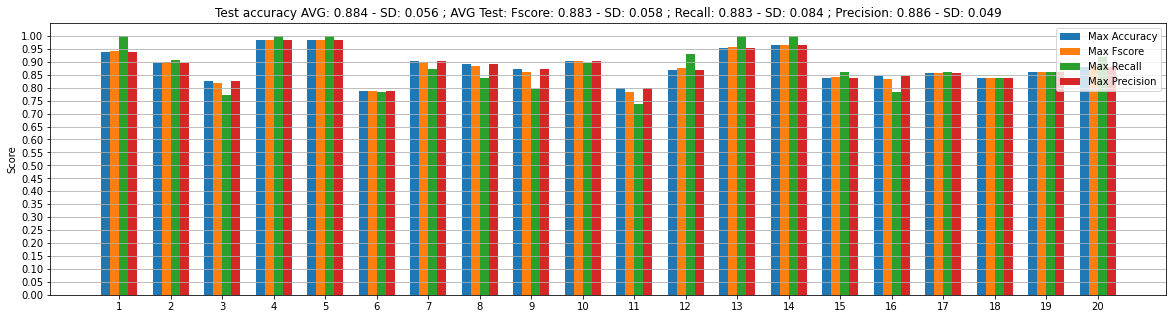

In [2]:
##Line chart: plot 10-fold-cv and random_subsampling results
plot.plot_bar(2,"openML","random_subsam","Fasttext2_364","sgd","CosineEmbeddingLoss",nit=["120"])


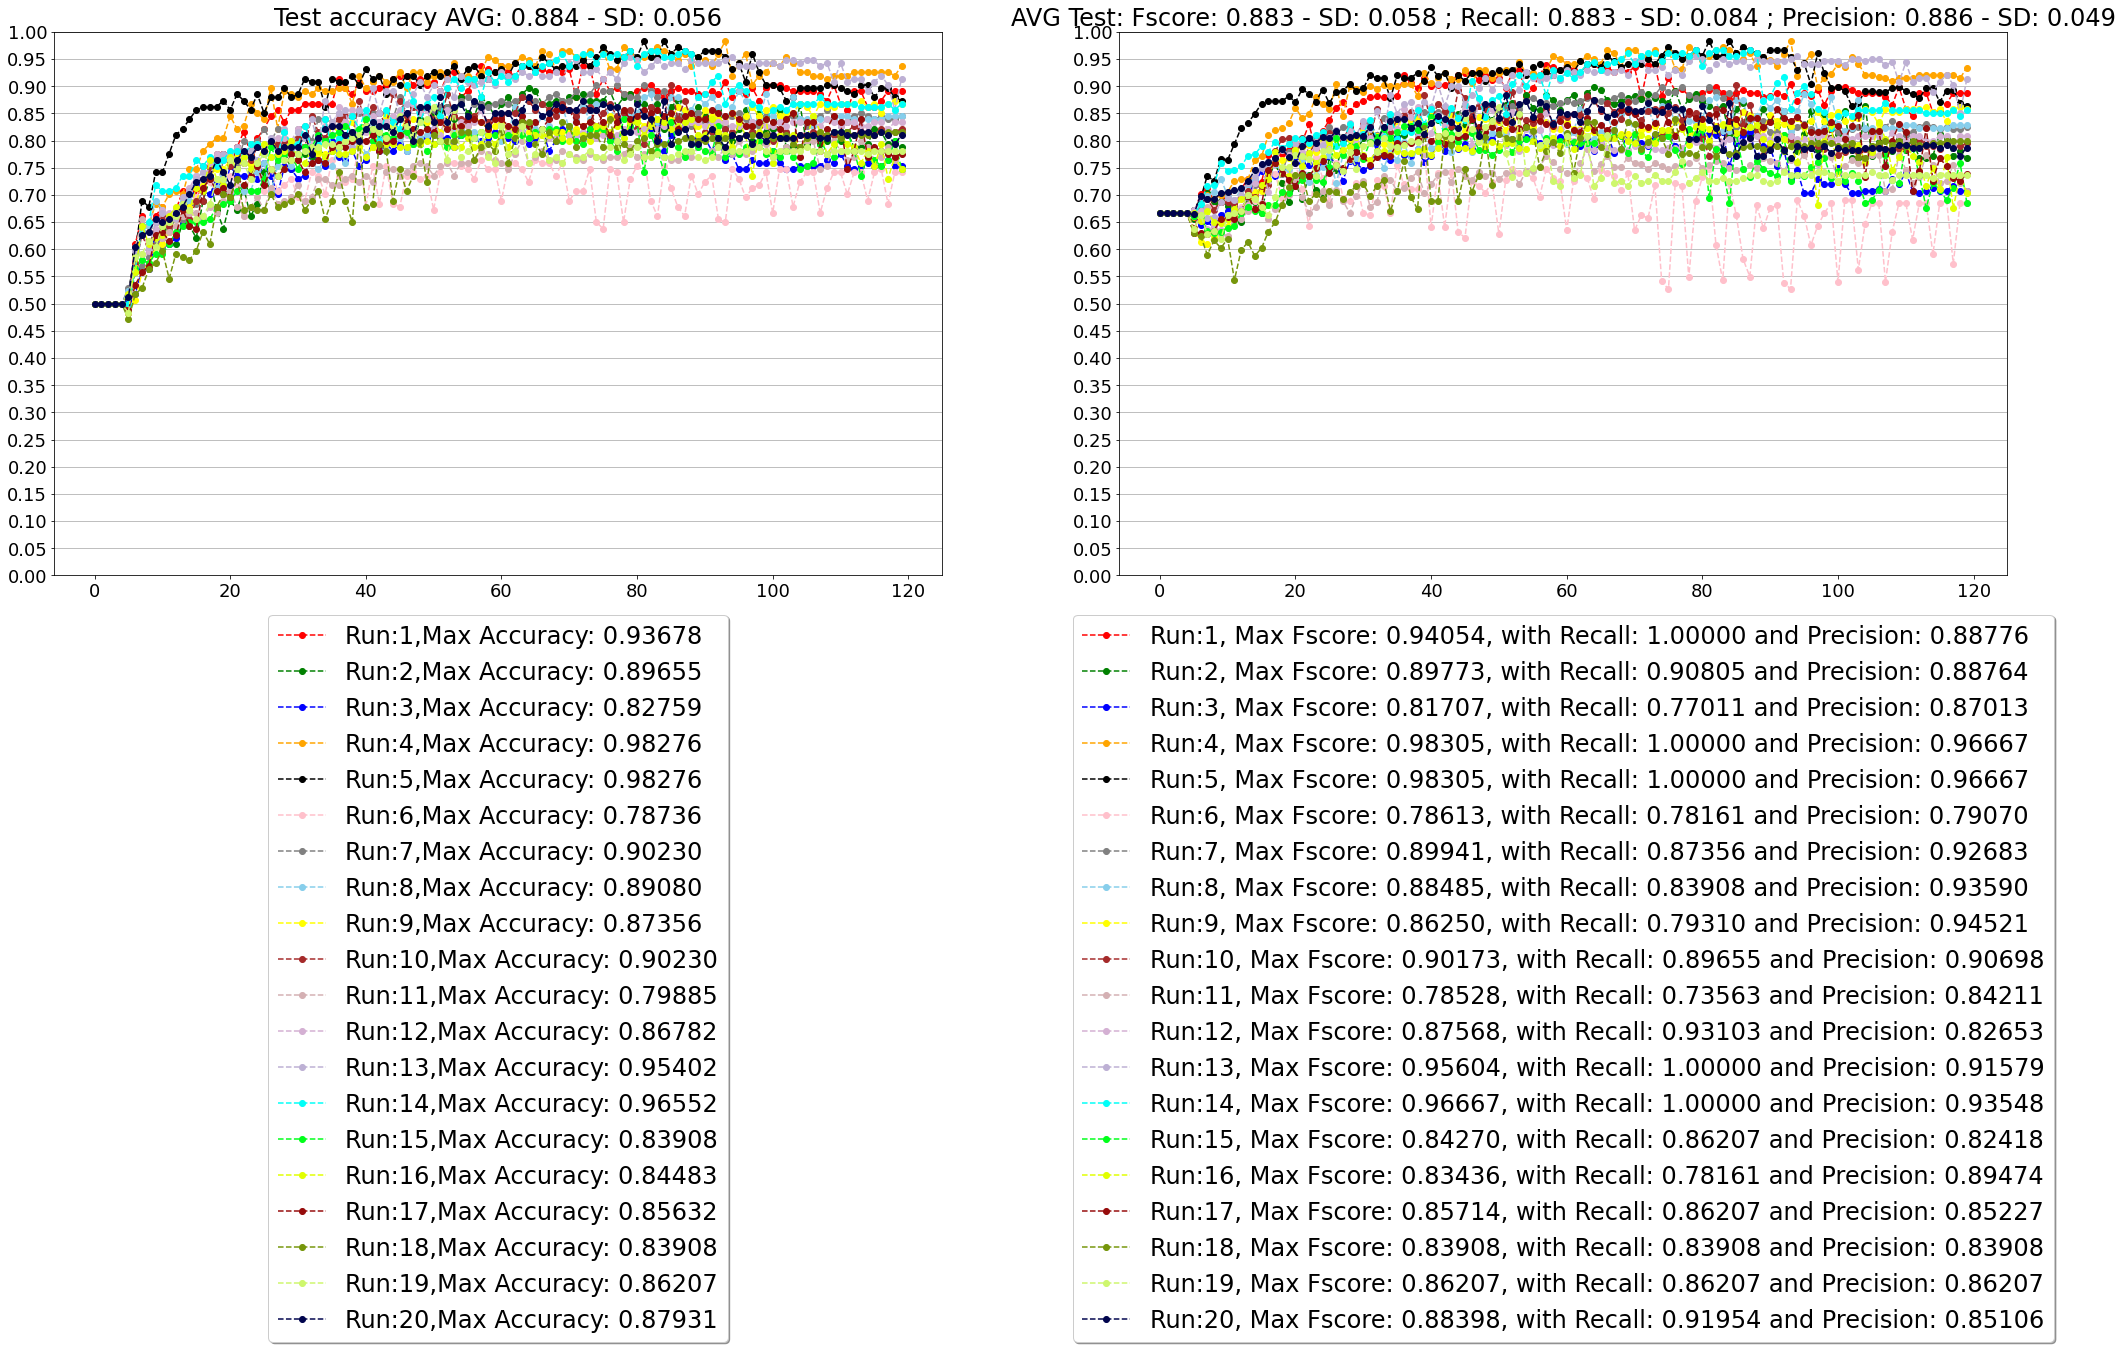

In [3]:
##Bar chart: plot 10-fold-cv and random_subsampling results
plot.plot_cv_details(2,"openML","random_subsam","Fasttext2_364","sgd","CosineEmbeddingLoss",nit=["120"])